In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

pd.set_option('display.max_columns', 500)
# pd.options.display.float_format = '{:.0f}'.format
drive.mount('/content/gdrive')
PATH = "gdrive/MyDrive/Datathon 2024/Raw Data/"
os.listdir("gdrive/MyDrive/Datathon 2024/Raw Data/")

Mounted at /content/gdrive


['Industry.csv',
 'Fuel.csv',
 'Unit.csv',
 'DS3_naics2017.txt',
 'uscities.csv',
 'kaggle_income.csv',
 'ghgp_data_parent_company_09_2023.xlsb',
 'emissions_by_unit_and_fuel_type_c_d_aa_09_2023.xlsb']

In [3]:
unit =pd.read_csv(PATH + "Unit.csv")
industry = pd.read_csv(PATH + "Industry.csv", index_col=0)
fuel = pd.read_csv(PATH + "Fuel.csv")
naics = pd.read_csv(PATH + "DS3_naics2017.txt", sep=",", encoding="latin1")

In [4]:
# unit
# fuel
# naics
# industry

In [5]:
fuel["Primary.NAICS.Code"] = fuel["Primary.NAICS.Code"].astype(str)
fuel_m = pd.merge(fuel, naics, left_on="Primary.NAICS.Code", right_on="NAICS")
fuel_m = fuel_m[fuel_m["DESCRIPTION"] == "Colleges, Universities, and Professional Schools"]
fuel_m

,Facility.Id,FRS.Id,Facility.Name,City,State,Primary.NAICS.Code,Year,Industry.Type,Sector,Unit.Name,Fuel.Type,Specific.Fuel.Type,Other.Fuel.Name,Blend.Fuel.Name,Methane.emissions,Nitrous.Oxide.emissions,NAICS,DESCRIPTION
206493,1006199,1.100440e+11,ARIZONA STATE UNIVERSITY,Tempe,AZ,611310,2022,C,Other,GP-Tempe2011,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,29.00,34.568,611310,"Colleges, Universities, and Professional Schools"
206494,1006199,1.100440e+11,ARIZONA STATE UNIVERSITY,Tempe,AZ,611310,2021,C,Other,GP-Tempe2011,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,28.00,33.376,611310,"Colleges, Universities, and Professional Schools"
206495,1006199,1.100440e+11,ARIZONA STATE UNIVERSITY,Tempe,AZ,611310,2020,C,Other,GP-Tempe2011,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,28.00,33.376,611310,"Colleges, Universities, and Professional Schools"
206496,1006199,1.100440e+11,ARIZONA STATE UNIVERSITY,Tempe,AZ,611310,2019,C,Other,GP-Tempe2011,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,24.00,28.608,611310,"Colleges, Universities, and Professional Schools"
206497,1006199,1.100440e+11,ARIZONA STATE UNIVERSITY,Tempe,AZ,611310,2018,C,Other,GP-Tempe2011,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,21.25,25.330,611310,"Colleges, Universities, and Professional Schools"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215172,1004835,1.100380e+11,YALE UNIVERSITY CENTRAL POWER PLANT,New haven,CT,611310,2012,C,Other,GP-001 Central Powerplant,Petroleum Products,Distillate Fuel Oil No. 2,NaN,NaN,1.25,3.278,611310,"Colleges, Universities, and Professional Schools"
215173,1004835,1.100380e+11,YALE UNIVERSITY CENTRAL POWER PLANT,New haven,CT,611310,2012,C,Other,GP-002 Residential Units - NG,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,2.25,2.682,611310,"Colleges, Universities, and Professional Schools"
215174,1004835,1.100380e+11,YALE UNIVERSITY CENTRAL POWER PLANT,New haven,CT,611310,2011,C,Other,GP-001 Central Powerplant,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,51.00,60.792,611310,"Colleges, Universities, and Professional Schools"
215175,1004835,1.100380e+11,YALE UNIVERSITY CENTRAL POWER PLANT,New haven,CT,611310,2011,C,Other,GP-001 Central Powerplant,Petroleum Products,Distillate Fuel Oil No. 2,NaN,NaN,2.50,5.960,611310,"Colleges, Universities, and Professional Schools"


In [6]:
unit["Primary.NAICS.Code"] = unit["Primary.NAICS.Code"].astype(str)
unit_m = pd.merge(unit, naics, left_on="Primary.NAICS.Code", right_on="NAICS")
unit_m = unit_m[unit_m["DESCRIPTION"] == "Colleges, Universities, and Professional Schools"]
# unit_m

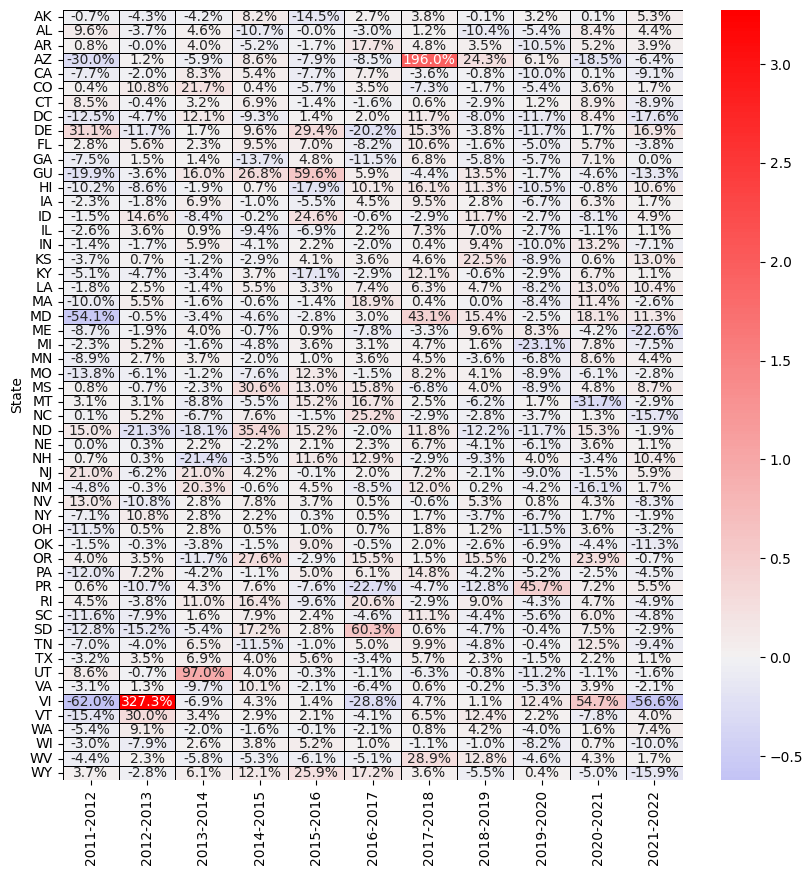

In [ ]:
from matplotlib.colors import ListedColormap, Normalize

positive_color = sns.light_palette("red", as_cmap=True)
negative_color = sns.light_palette("blue", as_cmap=True)
colors = np.vstack((negative_color(np.linspace(1, 0, 128)),
                    positive_color(np.linspace(0, 1, 128))))
cmap_custom = ListedColormap(colors)

delta = pd.pivot_table(unit, values="CO2.emissions.non.biogenic.", index="State", columns="Year", aggfunc="mean")
delta = delta.pct_change(axis=1)
delta.columns = ["2011"] + [f"{year-1}-{year}" for year in delta.columns[1:]]
delta = delta.drop("2011", axis=1)
fig, ax = plt.subplots(figsize=(10, 10))

norm = Normalize(vmin=delta.min().min(), vmax=delta.max().max())
sns.heatmap(delta, annot=True, fmt="0.01%", cmap=cmap_custom, linecolor='k', center=0, linewidths=0.5, ax=ax);

3.273141973650331

In [ ]:
def test_func(x):
  name = {"Name of Industry": []}
  facility = {"Facility Type": set()}
  for i in x:
    name["Name of Industry"].append(industry.loc[i, "Name of industry"])
    facility["Facility Type"].add(industry.loc[i, "Facility Type"])

In [ ]:
test = unit["Industry.Type"].str.split(",")
test.apply(lambda x: test_func(x))

KeyError: 'RR (RPT)'